In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
pathPickle = "Pickles"
path_df = pathPickle+"/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = pathPickle+"/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = pathPickle+"/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = pathPickle+"/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = pathPickle+"/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [3]:
knnc_0 =KNeighborsClassifier()

print('Parameters currently in use:\n')
pprint(knnc_0.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [4]:
# Create the parameter grid 
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 500, num = 100)]

param_grid = {'n_neighbors': n_neighbors}

# Create a base model
knnc = KNeighborsClassifier()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 76.3min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46,
                                         51, 56, 61, 66, 71, 76, 81, 86, 91, 96,
                                         101, 106, 111, 116, 121, 127, 132, 137,
                                         142, 147, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [5]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 1}

The mean accuracy of a model with these hyperparameters is:
0.9225023342670401


In [6]:
n_neighbors = [1,2,3,4,5,6,7,8,9,10,11]
param_grid = {'n_neighbors': n_neighbors}

knnc = KNeighborsClassifier()
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:  5.0min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [7]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 3}

The mean accuracy of a model with these hyperparameters is:
0.9235694277711084


In [8]:
best_knnc = grid_search.best_estimator_
best_knnc

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [9]:
best_knnc.fit(features_train, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [10]:
knnc_pred = best_knnc.predict(features_test)

In [11]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_knnc.predict(features_train)))
print("The test accuracy is: ")
print(accuracy_score(labels_test, knnc_pred))

The training accuracy is: 
0.9561484612336547
The test accuracy is: 
0.9349289454001496


In [12]:
print("Classification report")
print(classification_report(labels_test,knnc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        40
           1       0.94      0.97      0.95       585
           2       0.58      0.60      0.59        25
           3       0.95      0.95      0.95       279
           4       0.97      0.98      0.98        61
           5       0.96      0.94      0.95       148
           6       0.96      0.98      0.97        53
           7       0.65      0.39      0.49        28
           8       0.95      0.98      0.96        41
           9       0.96      0.87      0.91        55
          10       0.78      0.88      0.82         8
          11       0.91      0.91      0.91        11
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1

    accuracy                           0.93      1337
   macro avg       0.75      0.74      0.75      1337
weighted avg       0.93      0.93      0.93      1337



/home/kelu/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


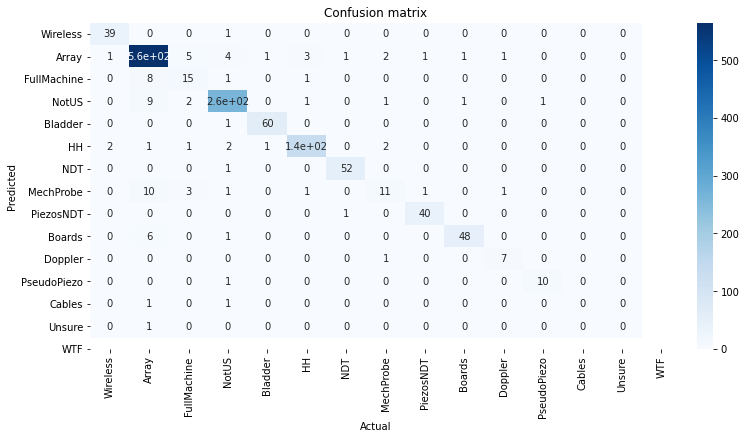

In [13]:
aux_df = df[['group', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, knnc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['group'].values, 
            yticklabels=aux_df['group'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [14]:
base_model = KNeighborsClassifier()
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.9364248317127898

In [15]:
best_knnc.fit(features_train, labels_train)
accuracy_score(labels_test, best_knnc.predict(features_test))

0.9349289454001496

In [16]:
d = {
     'Model': 'KNN',
     'Training Set Accuracy': accuracy_score(labels_train, best_knnc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, knnc_pred)
}

df_models_knnc = pd.DataFrame(d, index=[0])

In [17]:
df_models_knnc

,Model,Training Set Accuracy,Test Set Accuracy
0,KNN,0.956148,0.934929


In [18]:
with open('Models/best_knnc.pickle', 'wb') as output:
    pickle.dump(best_knnc, output)

with open('Models/df_models_knnc.pickle', 'wb') as output:
    pickle.dump(df_models_knnc, output)

# Testing the model

In [19]:
import pickle 
pathPickle = "Pickles"

path_X_train = pathPickle+"/X_train.pickle"
with open(path_X_train, 'rb') as data:
    X_train = pickle.load(data)

# X_test
path_X_test = pathPickle+"/X_test.pickle"
with open(path_X_test, 'rb') as data:
    X_test = pickle.load(data)

# y_train
path_y_train = pathPickle+"/y_train.pickle"
with open(path_y_train, 'rb') as data:
    y_train = pickle.load(data)

# y_test
path_y_test = pathPickle+"/y_test.pickle"
with open(path_y_test, 'rb') as data:
    y_test = pickle.load(data)

path_category_names = pathPickle+"/category_names.pickle"
with open(path_category_names, 'rb') as data:
    category_names = pickle.load(data)
    
with open('Models/best_knnc.pickle', 'rb') as data:
    best_knnc = pickle.load(data)

with open('Models/df_models_knnc.pickle', 'rb') as data:
    df_models_knnc = pickle.load(data)
    

In [20]:
predictions = best_knnc.predict(features_test)
# Indexes of the test set
index_X_test = X_test.index
# We get them from the original df
df_test = df.loc[index_X_test]
# Add the predictions
df_test['Prediction'] = predictions
# Clean columns
df_test = df_test[['Title','ItemID',"ViewItemURLForNaturalSearch", 'group', 'Category_Code', 'Prediction']]
# Decode
df_test['Category_Predicted'] = df_test['Prediction']
df_test = df_test.replace({'Category_Predicted':category_names})
# Clean columns again
df_test = df_test[['Title', 'ItemID',"ViewItemURLForNaturalSearch",'group', 'Category_Predicted']]
# Getting differences in results
DIFFERENCES1 = df_test[~(df_test["group"] == df_test["Category_Predicted"])]

predictions = best_knnc.predict(features_train)
# Indexes of the test set
index_X_test = X_train.index
# We get them from the original df
df_test = df.loc[index_X_test]
# Add the predictions
df_test['Prediction'] = predictions
# Clean columns
df_test = df_test[['Title','ItemID',"ViewItemURLForNaturalSearch", 'group', 'Category_Code', 'Prediction']]
# Decode
df_test['Category_Predicted'] = df_test['Prediction']
df_test = df_test.replace({'Category_Predicted':category_names})
# Clean columns again
df_test = df_test[['Title', 'ItemID',"ViewItemURLForNaturalSearch",'group', 'Category_Predicted']]
# Getting differences in results
DIFFERENCES2 = df_test[~(df_test["group"] == df_test["Category_Predicted"])]


diff = pd.concat([DIFFERENCES1,DIFFERENCES2])
diff

,Title,ItemID,ViewItemURLForNaturalSearch,group,Category_Predicted
1749,category3179 Aloka SSD 3500 Ultrasound EP4810...,323207155297,https://www.ebay.com/itm/Aloka-SSD-3500-Ultras...,Boards,PiezosNDT
799,category159711 Bladderscan BVI 3000 Diagnostic...,123712933033,https://www.ebay.com/itm/Bladderscan-BVI-3000-...,Bladder,None
62,category184542 WIFI Wireless Ultrasound Scanne...,184174486887,https://www.ebay.com/itm/WIFI-Wireless-Ultraso...,Wireless,MechProbe
1,category184542 Wireless Ultrasound Scanner Dua...,303261591524,https://www.ebay.com/itm/Wireless-Ultrasound-S...,Wireless,MechProbe
6672,category184515 Verathon 0570-0091 BladderScan ...,273943248402,https://www.ebay.com/itm/Verathon-0570-0091-Bl...,Bladder,None
...,...,...,...,...,...
4211,category184542 CE Veterinary Ultrasound Scanne...,114140899182,https://www.ebay.com/itm/CE-Veterinary-Ultraso...,HH,FullMachine
2096,category3179 ATL Beamformer Focus Assy Board 7...,283349164040,https://www.ebay.com/itm/ATL-Beamformer-Focus-...,Boards,PiezosNDT
6995,category9886 Original BMW 66209359090 - Ultras...,312841191540,https://www.ebay.com/itm/Original-BMW-66209359...,NotUS,HH
2033,category9886 MOUNTING PROPSHAFT FOR FORD TRANS...,352913042312,https://www.ebay.com/itm/MOUNTING-PROPSHAFT-FO...,NotUS,HH
